# Notebook to plot training progress of agent

It will obtain d
ata from file stored in format like `bullet_racecar.cma.1.32.hist.json` and `.hist_best.json`, where format is `env_name.optimizer.num_rollouts.popsize.hist.json`.


In [2]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt

In [3]:
env_name = 'doomrnn'
optimizer = 'cma'
num_rollouts = 16 # number of rollouts that are averaged over an episode
popsize = 64

In [4]:
file_base = env_name+'.'+optimizer+'.'+str(num_rollouts)+'.'+str(popsize)
#filename = os.path.join('log', file_base+'.hist.json')
name = "_b40.0_4"
filename = os.path.join('beta_log', file_base+name+'.hist.json')
with open(filename, 'r') as f:
  raw_data = json.load(f)
data = np.array(raw_data)
print(data.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'beta_log/doomrnn.cma.16.64_b40.0_4.hist.json'

In [22]:
file_base = env_name+'.'+optimizer+'.'+str(num_rollouts)+'.'+str(popsize)
#filename = os.path.join('log', file_base+'.hist_best.json')
filename = os.path.join('beta_log', file_base+name+'.hist_best.json')
with open(filename, 'r') as f:
  raw_data = json.load(f)
raw_best_data = np.array(raw_data)
print(raw_best_data.shape)
best_data = []
for bdata in raw_best_data:
  best_data.append([float(bdata[0]), float(bdata[1]), float(bdata[5]), float(bdata[9])])
best_data = np.array(best_data)

(8, 10)


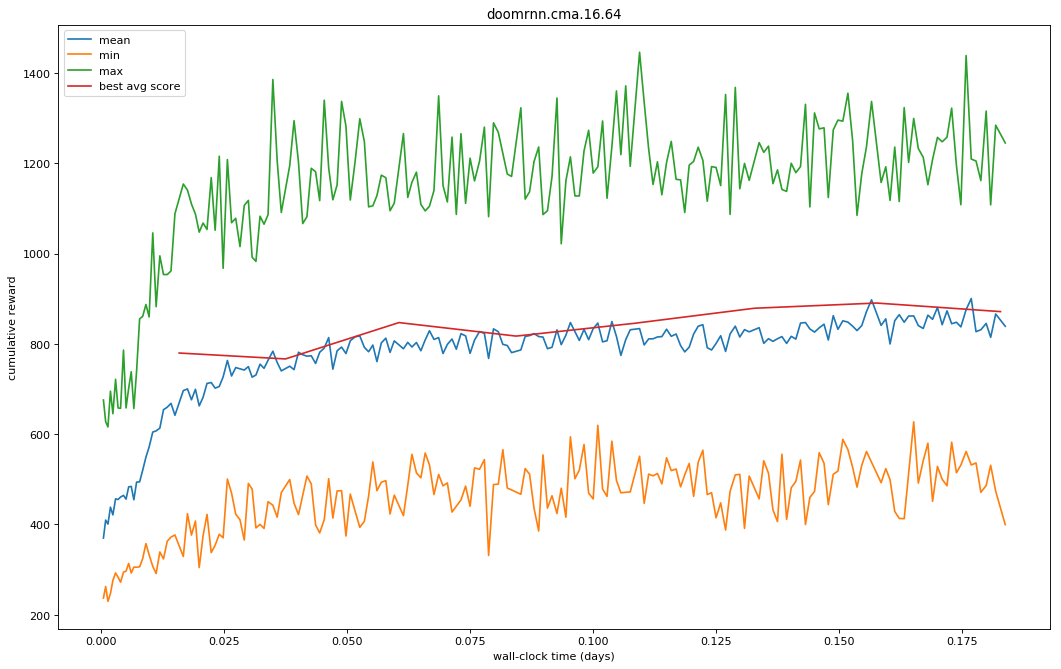

In [23]:
fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
line_mean, = plt.plot(data[:, 1]/(60*24*60), data[:, 2])
line_min, = plt.plot(data[:, 1]/(60*24*60), data[:, 3])
line_max, = plt.plot(data[:, 1]/(60*24*60), data[:, 4])
line_best, = plt.plot(best_data[:, 1]/(60*24*60), best_data[:, 2])
plt.legend([line_mean, line_min, line_max, line_best], ['mean', 'min', 'max', 'best avg score'])
plt.xlabel('wall-clock time (days)')
plt.ylabel('cumulative reward')
plt.title(file_base)
plt.savefig(file_base+".wall.svg")
plt.show()

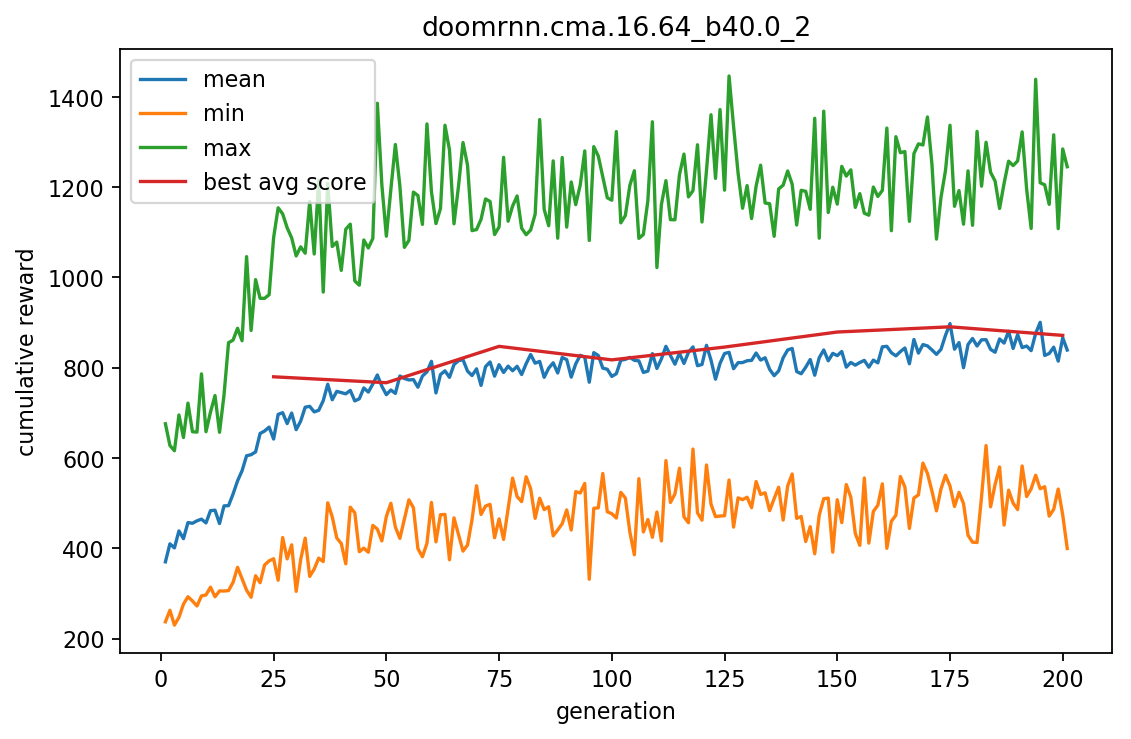

In [24]:
fig=plt.figure(figsize=(8, 5), dpi= 160, facecolor='w', edgecolor='k')
line_mean, = plt.plot(data[:, 0], data[:, 2])
line_min, = plt.plot(data[:, 0], data[:, 3])
line_max, = plt.plot(data[:, 0], data[:, 4])
line_best, = plt.plot(best_data[:, 0], best_data[:, 2])
plt.legend([line_mean, line_min, line_max, line_best], ['mean', 'min', 'max', 'best avg score'])
plt.xlabel('generation')
plt.ylabel('cumulative reward')
plt.title(file_base+name)
plt.savefig(file_base+".svg")
plt.show()